In [1]:
import pandas as pd

datos = pd.read_csv('dataframe.csv',sep=',')

In [2]:
datos

,Unnamed: 0,LanguageName,Latitude,Longitude,WordModernName1,Phonetic,SpellingAltv1,source_csv
0,0,Ref. Spelling,-40.00000,-75.50000,ellos,fëjëŋɘn,feyengün,12-feyengün.csv
1,1,Santa Bárbara,-37.67405,-71.80186,ellos,ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
2,2,Cañete,-37.96722,-73.39282,ellos,cʰɪ.ˈðwɪ.ŋɘn,NaN,12-feyengün.csv
3,3,Tirúa,-38.36990,-73.49067,ellos,ˈɸë.jë.ɣ̞ɐ̝,NaN,12-feyengün.csv
4,4,Alto Bío Bío,-38.04457,-71.36344,ellos,m̩.ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
...,...,...,...,...,...,...,...,...
1336,1336,Huiliches,-39.63992,-71.18686,vino,pʊl.ˈkʊ,NaN,9-pulkü.csv
1337,1337,Jacobacci,-41.28813,-69.55719,vino,ɸʊl.ˈkʰʊ,NaN,9-pulkü.csv
1338,1338,Cushamen,-42.23392,-71.34994,vino,pʰʊl.ˈkʰʊ,NaN,9-pulkü.csv
1339,1339,Futaleufú,-42.95052,-71.18351,vino,ɸʊl.ˈxʊ,NaN,9-pulkü.csv


In [3]:
names = set(datos['LanguageName'])

In [4]:
latitud = dict(zip(datos['LanguageName'],datos['Latitude']))
longitud = dict(zip(datos['LanguageName'],datos['Longitude']))

In [5]:
!pip install haversine

In [6]:
from haversine import haversine

dist_ref = {}

for name in names:
    dist_ref[name]=haversine((latitud['Ref. Spelling'],longitud['Ref. Spelling']),(latitud[name],longitud[name]))

In [7]:
dict(sorted(dist_ref.items(), key=lambda item: item[1]))

{'Ref. Spelling': 0.0,
 'S. Juan de la Costa': 177.2301646411767,
 'San Pablo': 187.52961105844628,
 'Mariquina': 200.66463550716253,
 'Valdivia': 218.12032841870442,
 'Nueva Toltén': 221.15562634114468,
 'Puerto Saavedra': 225.5252027037372,
 'Tirúa': 250.67761263456197,
 'Freire': 250.96348222924908,
 'Lanco': 266.94833257084656,
 'Chol Chol': 272.9018985250136,
 'Dollinco': 273.13440851944256,
 'Villarrica': 279.16837427982796,
 'Cañete': 290.2632931832423,
 'Panguipulli': 292.749353721012,
 'Galvarino': 293.40598618706326,
 'Truf Truf': 297.1690821506928,
 'Lumaco': 302.4937108473996,
 'Vilcún': 315.5253689601365,
 'Cunco': 320.0409799366874,
 'Victoria': 338.71066341320477,
 'Angol': 340.3195155866509,
 'Ercilla': 341.54143070236387,
 'Curarrehue': 342.7200756940107,
 'Junín de los Andes': 359.79125763113615,
 'Huiliches': 370.4940777627709,
 'Aluminé': 391.207483327272,
 'Lonquimay': 396.4700944105974,
 'Icalma': 397.1683552087326,
 'Santa Bárbara': 411.623510725252,
 'Alto Bío B

In [8]:
names

{'Alto Bío Bío',
 'Aluminé',
 'Angol',
 'Cañete',
 'Chalileo',
 'Chol Chol',
 'Cunco',
 'Curarrehue',
 'Cushamen',
 'Dollinco',
 'Ercilla',
 'Freire',
 'Futaleufú',
 'Galvarino',
 'Huiliches',
 'Icalma',
 'Jacobacci',
 'Junín de los Andes',
 'Lago Rosario',
 'Lanco',
 'Lonquimay',
 'Lumaco',
 'Mariquina',
 'Nueva Toltén',
 'Panguipulli',
 'Picunches',
 'Puerto Saavedra',
 'Ref. Spelling',
 'S. Juan de la Costa',
 'San Pablo',
 'Santa Bárbara',
 'Tirúa',
 'Truf Truf',
 'Valdivia',
 'Victoria',
 'Vilcún',
 'Villarrica',
 'Zapala'}

In [9]:
palabras = set(datos['WordModernName1'])

In [10]:
palabras

{'amigo',
 'bajar',
 'boca',
 'bueno',
 'cama',
 'camino',
 'campo',
 'cochayuyo',
 'cola',
 'coser',
 'cuerno',
 'dia',
 'ellos',
 'estrella',
 'fuego',
 'grande',
 'harina_tostada',
 'hoja',
 'lengua',
 'lenya',
 'llorar',
 'luna',
 'mano',
 'matar',
 'negro',
 'noble',
 'nombre',
 'nube',
 'persona_que_ensenya',
 'pie',
 'puerta',
 'rojo',
 'saber',
 'sangre',
 'sol',
 'tengo_hambre',
 'tres',
 'vestido_lana',
 'vino',
 'zorro'}

In [11]:
palabras_elegidas = ['camino'] ## puedes agregar más

In [12]:
dict_datos = {L:{} for L in names}

In [13]:
for L in names:
    for word in palabras_elegidas:
        D = datos[datos['LanguageName']==L]
        try:
            dict_datos[L][word]=list(D[D['WordModernName1']==word]['Phonetic'])[0]
        except IndexError:
            pass#dict_datos[L][word]='unk'

In [14]:
set_palabras = []

for L in names:
    set_palabras+=[list(dict_datos[L].keys())]

In [15]:
set_palabras = list(set.intersection(*map(set,set_palabras)))

In [16]:
set_palabras

['camino']

In [17]:
dict_datos = {name:{word:dict_datos[name][word] for word in set_palabras} for name in names}

In [18]:
dict_datos['San Pablo']

{'camino': 'ˈʂʊ.bö'}

In [19]:
dict_datos['S. Juan de la Costa']

{'camino': 'ˈʂɘ.pɘ'}

In [20]:
import itertools
pares_localidades = list(itertools.product(list(dict_datos.keys()), list(dict_datos.keys())))

In [21]:
pares_localidades

[('Vilcún', 'Vilcún'),
 ('Vilcún', 'San Pablo'),
 ('Vilcún', 'Jacobacci'),
 ('Vilcún', 'Cunco'),
 ('Vilcún', 'Dollinco'),
 ('Vilcún', 'Ref. Spelling'),
 ('Vilcún', 'Alto Bío Bío'),
 ('Vilcún', 'Angol'),
 ('Vilcún', 'Zapala'),
 ('Vilcún', 'Junín de los Andes'),
 ('Vilcún', 'Lanco'),
 ('Vilcún', 'Aluminé'),
 ('Vilcún', 'Lago Rosario'),
 ('Vilcún', 'Huiliches'),
 ('Vilcún', 'Victoria'),
 ('Vilcún', 'Truf Truf'),
 ('Vilcún', 'Chalileo'),
 ('Vilcún', 'Icalma'),
 ('Vilcún', 'Ercilla'),
 ('Vilcún', 'Curarrehue'),
 ('Vilcún', 'Cañete'),
 ('Vilcún', 'Santa Bárbara'),
 ('Vilcún', 'S. Juan de la Costa'),
 ('Vilcún', 'Lonquimay'),
 ('Vilcún', 'Mariquina'),
 ('Vilcún', 'Picunches'),
 ('Vilcún', 'Tirúa'),
 ('Vilcún', 'Puerto Saavedra'),
 ('Vilcún', 'Valdivia'),
 ('Vilcún', 'Galvarino'),
 ('Vilcún', 'Cushamen'),
 ('Vilcún', 'Panguipulli'),
 ('Vilcún', 'Chol Chol'),
 ('Vilcún', 'Villarrica'),
 ('Vilcún', 'Futaleufú'),
 ('Vilcún', 'Freire'),
 ('Vilcún', 'Lumaco'),
 ('Vilcún', 'Nueva Toltén'),
 ('San Pa

In [22]:
## aquí guardas las distancias

distancias = {L:{LL:0 for LL in list(dict_datos.keys())} for L in list(dict_datos.keys())}

In [23]:
!pip install jellyfish

In [24]:
import jellyfish

def funcion_distancia(string1,string2):
    #return 1-jellyfish.jaro_winkler_similarity(string1,string2)
    return jellyfish.levenshtein_distance(string1,string2)/(max(len(string1),len(string2)))

In [25]:
## tienes q recorrer pares_localidades

for par in pares_localidades:
    D = 0
    words1 = dict_datos[par[0]]
    words2 = dict_datos[par[1]]
    words1and2 = list(set(words1) & set(words2))
    for word in words1and2:
        D += funcion_distancia(dict_datos[par[0]][word],dict_datos[par[1]][word])
    distancias[par[0]][par[1]]=D/len(words1and2)

In [26]:
distancias['Ref. Spelling']

{'Vilcún': 0.5,
 'San Pablo': 1.0,
 'Jacobacci': 0.3333333333333333,
 'Cunco': 0.6666666666666666,
 'Dollinco': 0.3333333333333333,
 'Ref. Spelling': 0.0,
 'Alto Bío Bío': 0.5,
 'Angol': 0.5,
 'Zapala': 0.3333333333333333,
 'Junín de los Andes': 0.6666666666666666,
 'Lanco': 0.5,
 'Aluminé': 0.3333333333333333,
 'Lago Rosario': 0.5,
 'Huiliches': 0.5,
 'Victoria': 0.5,
 'Truf Truf': 0.5714285714285714,
 'Chalileo': 0.5,
 'Icalma': 0.5,
 'Ercilla': 0.6666666666666666,
 'Curarrehue': 0.5,
 'Cañete': 0.5,
 'Santa Bárbara': 0.42857142857142855,
 'S. Juan de la Costa': 0.5,
 'Lonquimay': 0.5,
 'Mariquina': 0.6666666666666666,
 'Picunches': 0.6666666666666666,
 'Tirúa': 0.875,
 'Puerto Saavedra': 0.3333333333333333,
 'Valdivia': 0.5,
 'Galvarino': 0.5,
 'Cushamen': 0.5,
 'Panguipulli': 0.5,
 'Chol Chol': 0.8571428571428571,
 'Villarrica': 0.5,
 'Futaleufú': 0.6666666666666666,
 'Freire': 0.5,
 'Lumaco': 0.7142857142857143,
 'Nueva Toltén': 0.5}

In [27]:
dict_geo_fon = {}

for localidad in distancias['Ref. Spelling'].keys():
    dict_geo_fon[localidad]=[dist_ref[localidad],distancias['Ref. Spelling'][localidad]]

In [28]:
X = [dict_geo_fon[localidad][0] for localidad in dict_geo_fon.keys()]
Y = [dict_geo_fon[localidad][1] for localidad in dict_geo_fon.keys()]

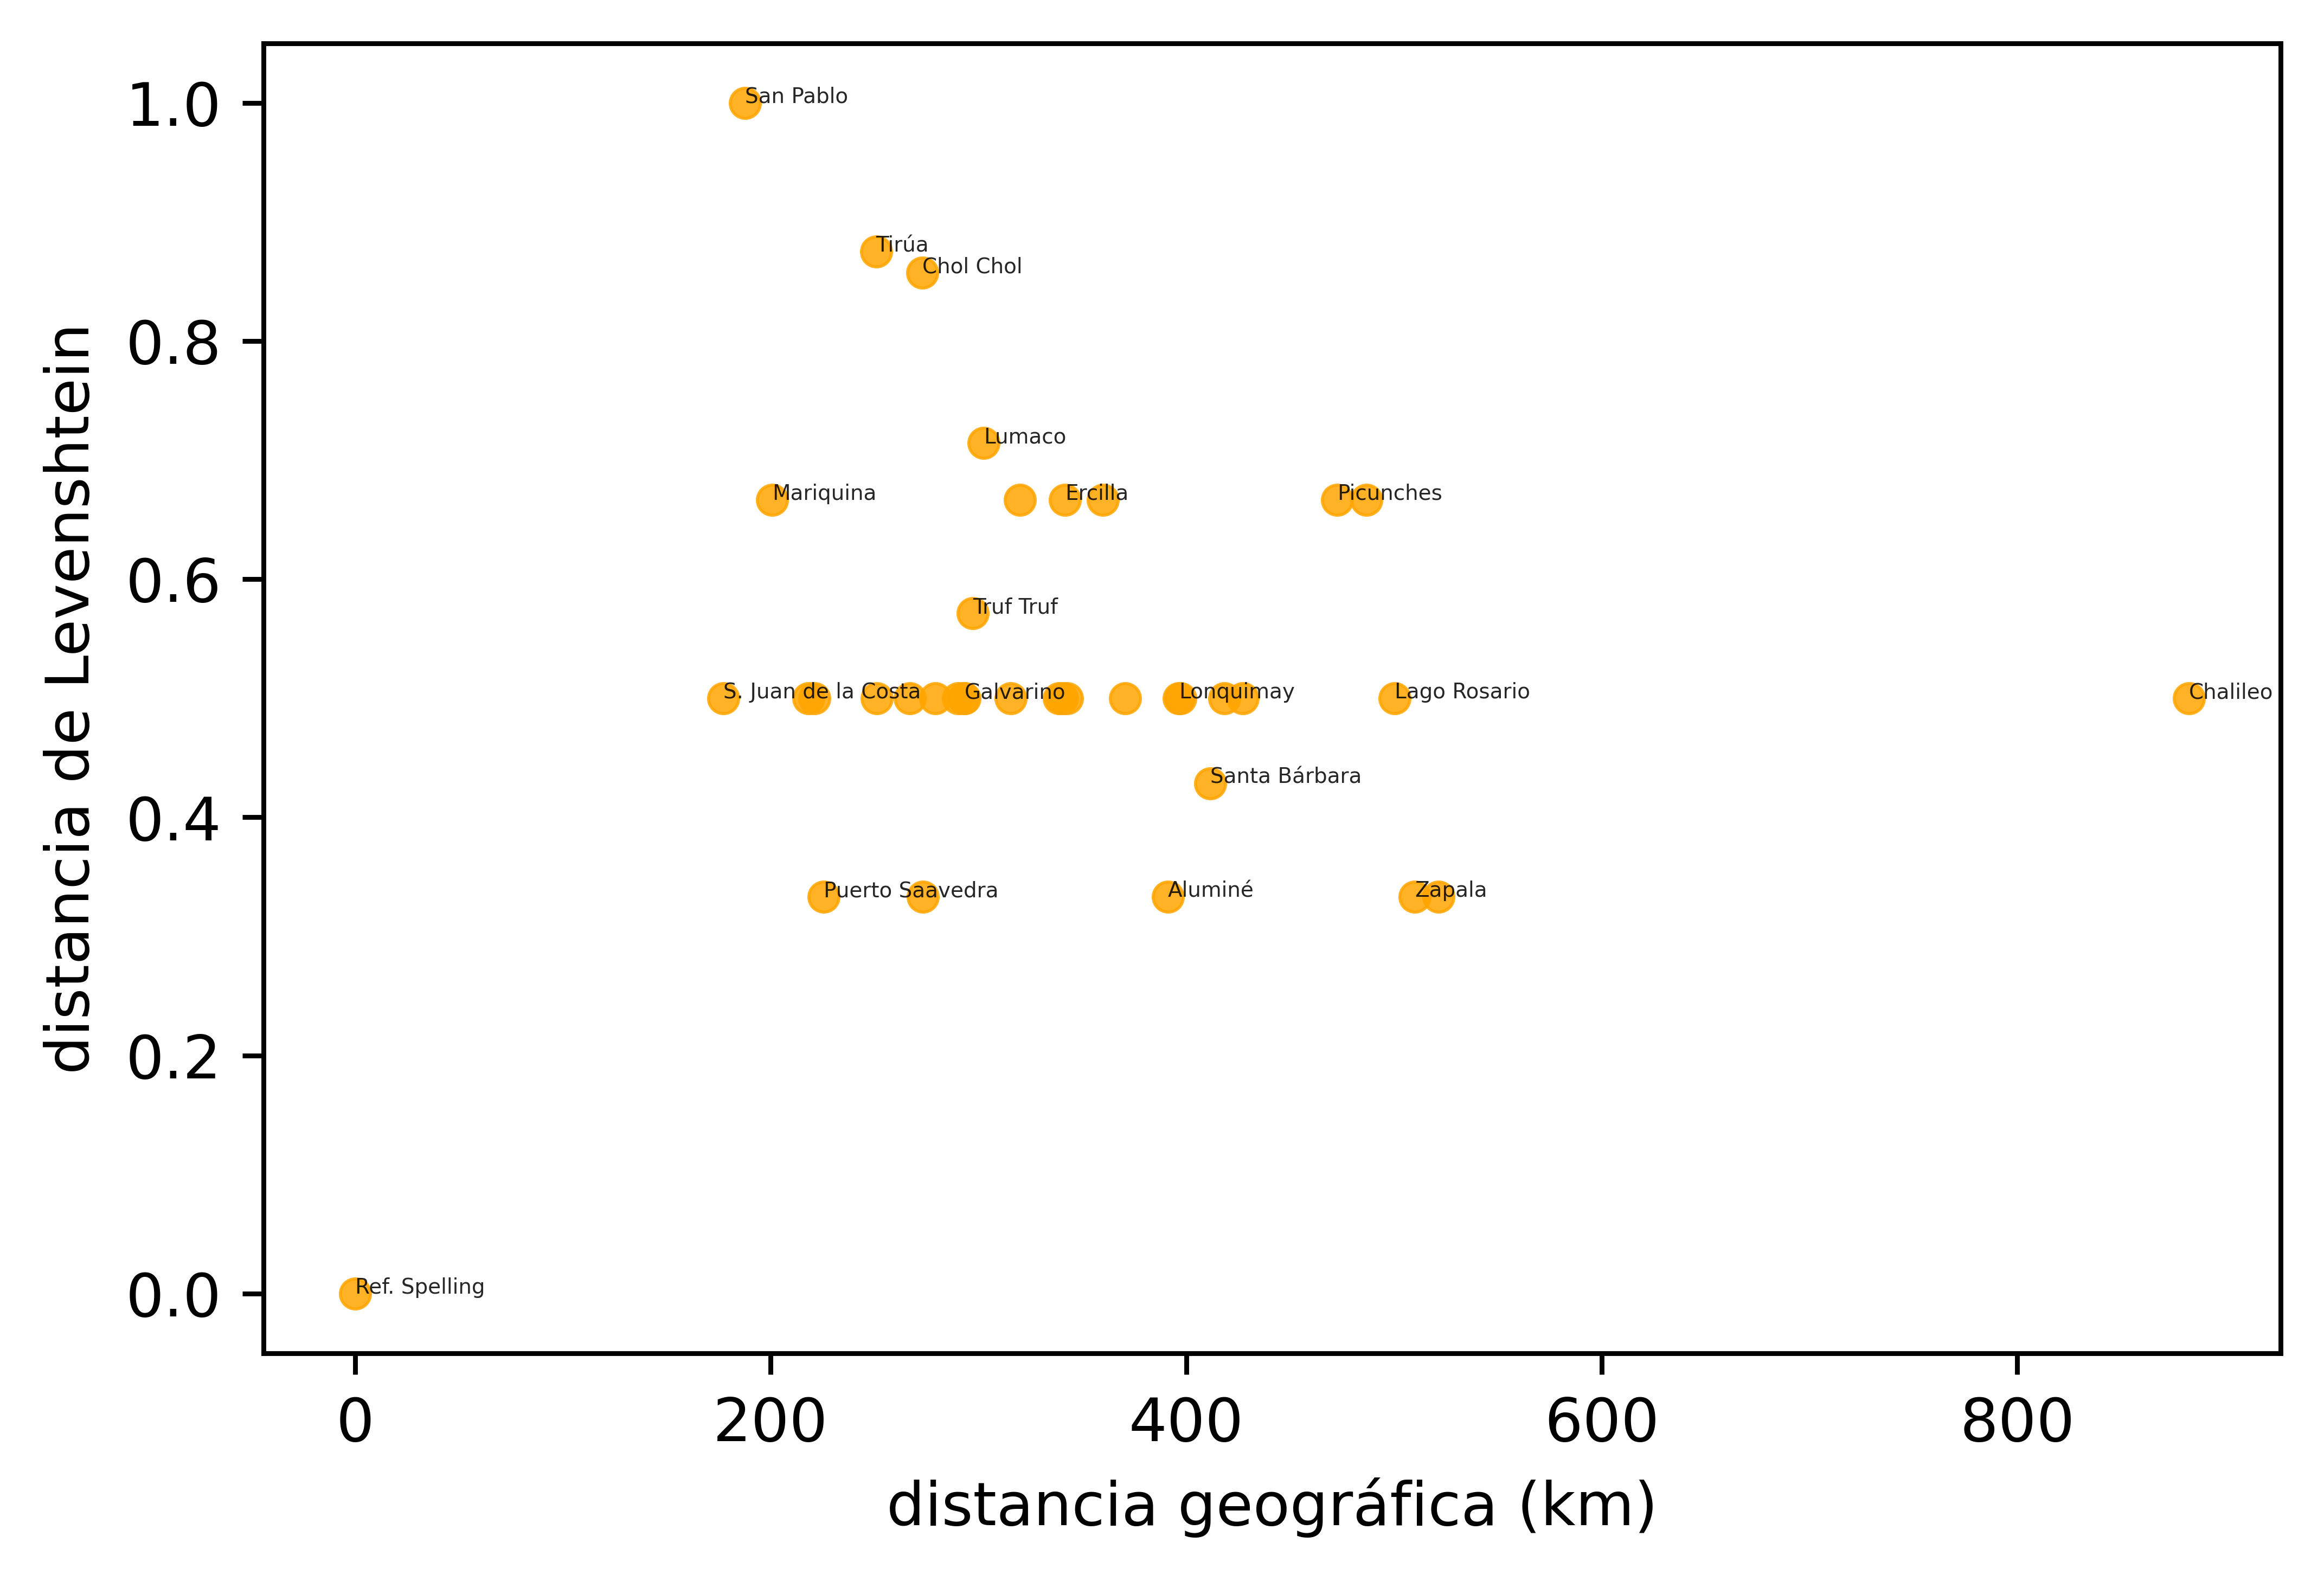

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for localidad in dict_geo_fon.keys():
    i = list(dict_geo_fon.keys()).index(localidad)
    if localidad in ['Ref. Spelling','Picunches','Lonquimay','Lago Rosario','Ercilla','Galvarino','Tirúa','S. Juan de la Costa','San Pablo','Mariquina','Chalileo',
 'Lumaco','Tirúa','Zapala','Truf Truf','Aluminé','Chol Chol','Puerto Saavedra','Zapala','Santa Bárbara']:
        ax.annotate(localidad, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)


plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Levenshtein',fontsize=10)
plt.xlabel(r'distancia geográfica (km)',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('geo_Lev_camino.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [55]:
DF = pd.DataFrame.from_dict(distancias)

In [56]:
DF

,Vilcún,San Pablo,Jacobacci,Cunco,Dollinco,Ref. Spelling,Alto Bío Bío,Angol,Zapala,Junín de los Andes,...,Valdivia,Galvarino,Cushamen,Panguipulli,Chol Chol,Villarrica,Futaleufú,Freire,Lumaco,Nueva Toltén
Vilcún,0.000000,0.857143,0.166667,0.500000,0.166667,0.500000,0.333333,0.333333,0.166667,0.166667,...,0.333333,0.333333,0.333333,0.333333,0.428571,0.000000,0.500000,0.000000,0.857143,0.333333
San Pablo,0.857143,0.000000,0.857143,0.714286,0.857143,1.000000,0.714286,0.714286,0.857143,0.857143,...,0.714286,0.714286,0.714286,0.714286,0.857143,0.857143,0.857143,0.857143,0.857143,0.714286
Jacobacci,0.166667,0.857143,0.000000,0.333333,0.000000,0.333333,0.500000,0.500000,0.000000,0.333333,...,0.500000,0.500000,0.166667,0.500000,0.571429,0.166667,0.333333,0.166667,0.714286,0.500000
Cunco,0.500000,0.714286,0.333333,0.000000,0.333333,0.666667,0.833333,0.833333,0.333333,0.666667,...,0.833333,0.833333,0.166667,0.833333,0.428571,0.500000,0.333333,0.500000,0.571429,0.833333
Dollinco,0.166667,0.857143,0.000000,0.333333,0.000000,0.333333,0.500000,0.500000,0.000000,0.333333,...,0.500000,0.500000,0.166667,0.500000,0.571429,0.166667,0.333333,0.166667,0.714286,0.500000
Ref. Spelling,0.500000,1.000000,0.333333,0.666667,0.333333,0.000000,0.500000,0.500000,0.333333,0.666667,...,0.500000,0.500000,0.500000,0.500000,0.857143,0.500000,0.666667,0.500000,0.714286,0.500000
Alto Bío Bío,0.333333,0.714286,0.500000,0.833333,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.666667,0.000000,0.714286,0.333333,0.833333,0.333333,0.571429,0.000000
Angol,0.333333,0.714286,0.500000,0.833333,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.666667,0.000000,0.714286,0.333333,0.833333,0.333333,0.571429,0.000000
Zapala,0.166667,0.857143,0.000000,0.333333,0.000000,0.333333,0.500000,0.500000,0.000000,0.333333,...,0.500000,0.500000,0.166667,0.500000,0.571429,0.166667,0.333333,0.166667,0.714286,0.500000
Junín de los Andes,0.166667,0.857143,0.333333,0.666667,0.333333,0.666667,0.500000,0.500000,0.333333,0.000000,...,0.500000,0.500000,0.500000,0.500000,0.571429,0.166667,0.333333,0.166667,1.000000,0.500000


In [58]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D):
    
    
    linkage = hc.linkage(sp.distance.squareform(DF), method='ward')
        
    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D,cmap='OrRd',row_linkage=linkage, col_linkage=linkage,linewidth=1,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
       
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmap_camino.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

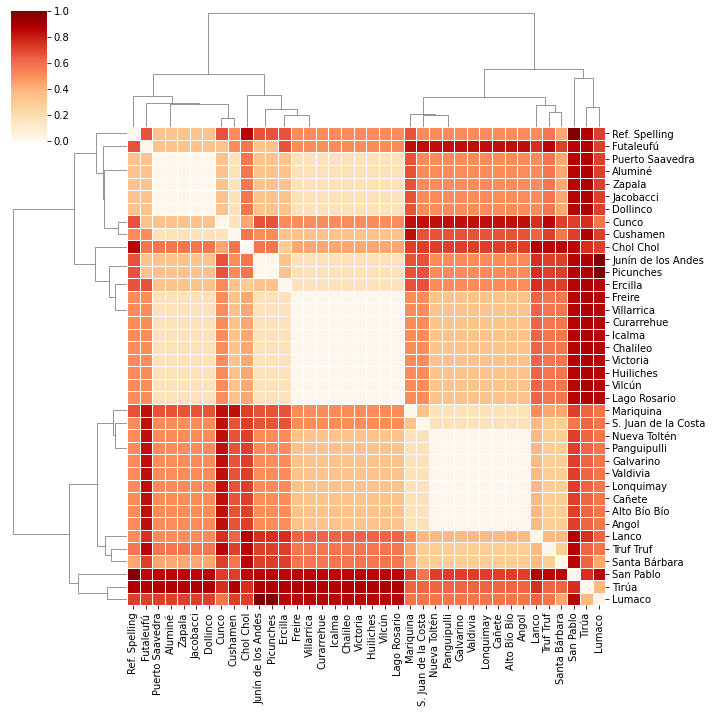

In [59]:
mapa_calor(distancias)

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

labels_dict = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
S = []
for n_clusters in range_n_clusters:
    
    cluster = KMeans(n_clusters=n_clusters)#, linkage='ward')
    distArray = sp.distance.squareform(DF.to_numpy())
    cluster_labels = cluster.fit_predict(DF.values)
    labels_dict[n_clusters]=cluster_labels
    silhouette_avg = silhouette_score(DF.values, cluster_labels, metric = 'precomputed')
    S.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5136481521087379
For n_clusters = 3 The average silhouette_score is : 0.5113741568297151
For n_clusters = 4 The average silhouette_score is : 0.5056394563542219
For n_clusters = 5 The average silhouette_score is : 0.4499041206555589
For n_clusters = 6 The average silhouette_score is : 0.5266283470836207
For n_clusters = 7 The average silhouette_score is : 0.5208849827881025
For n_clusters = 8 The average silhouette_score is : 0.5431245263934928
For n_clusters = 9 The average silhouette_score is : 0.5083318768412258
For n_clusters = 10 The average silhouette_score is : 0.5320231948396542
